In [101]:
import pandas
df=pandas.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [102]:
df.shape

(7043, 21)

In [103]:
df.drop(columns=["customerID"],inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [105]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

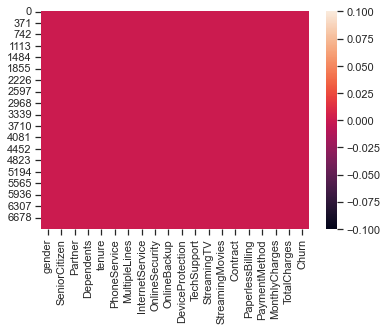

In [106]:
import seaborn as sns
sns.heatmap(df.isnull())

In [107]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

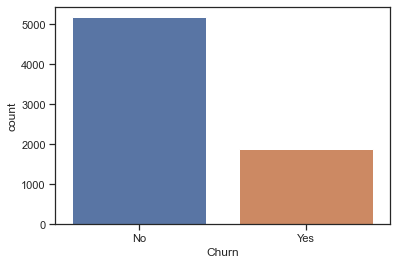

In [108]:
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=df)
plt.show()
#this shows dataset is imbalanced 

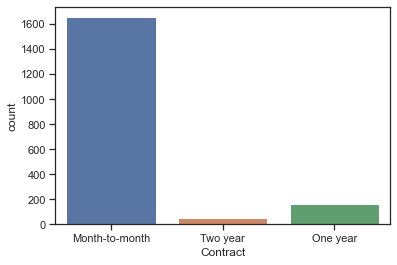

In [109]:
sns.countplot(x="Contract",data=df.loc[df["Churn"]=="Yes"])
plt.show()
#Customers who have churned are mostly having contract of "Month to Month"

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

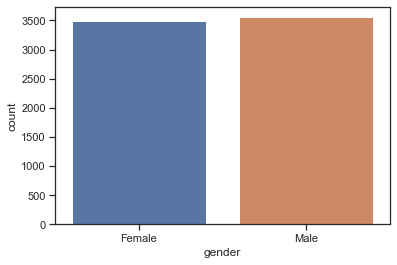

In [110]:
sns.countplot(df['gender'])

([<matplotlib.patches.Wedge at 0x23f6f5aaa90>,
 [Text(-0.9603414027015803, 0.5364181114179138, 'Not- Senior'),
  Text(0.9603414278131233, -0.5364180664610878, 'Senior')],
 [Text(-0.523822583291771, 0.29259169713704386, '83.79%'),
  Text(0.5238225969889763, -0.29259167261513874, '16.21%')])

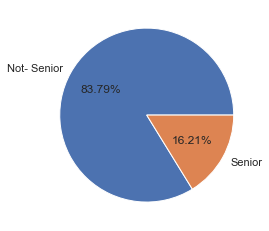

In [111]:
plt.pie((df['SeniorCitizen'].value_counts(normalize=True)*100).values,labels=['Not- Senior','Senior'],autopct='%1.2f%%')

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


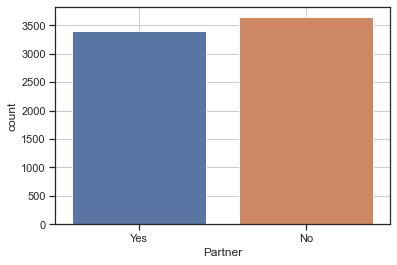

In [112]:
sns.set(style="ticks")
sns.countplot(df['Partner'])
plt.grid()

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


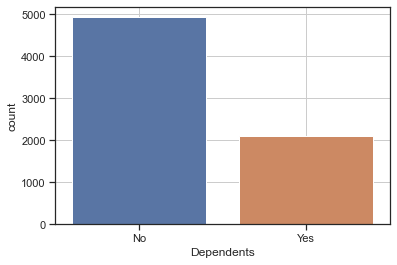

In [113]:
sns.countplot(df['Dependents'])
plt.grid()

In [114]:
df['tenure'].nunique()

73

In [115]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

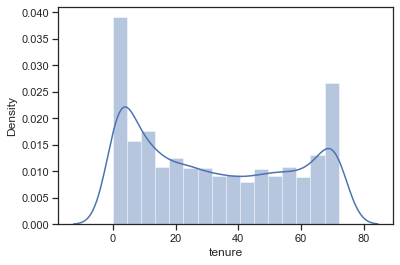

In [116]:
sns.distplot(df['tenure'])

([<matplotlib.patches.Wedge at 0x23f6f7411c0>,
 [Text(-1.0494915966975706, 0.3294956577273573, 'Phone Service Used'),
  Text(1.049491627547176, -0.32949555946686127, 'Not used')],
 [Text(-0.5724499618350385, 0.17972490421492215, '90.32%'),
  Text(0.5724499786620959, -0.17972485061828794, '9.68%')])

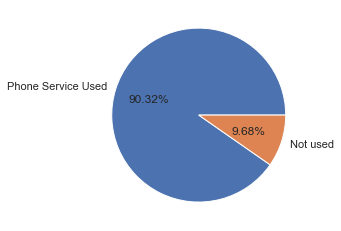

In [117]:
plt.pie(df['PhoneService'].value_counts().values,labels=['Phone Service Used','Not used'],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f70ef6640>,
 [Text(0.20752658810331015, 1.0802465992680557, 'Fiber optic'),
  Text(-0.8411049099748845, -0.7089023419457307, 'DSL'),
  Text(0.8548554654106661, -0.6922587184409551, 'No')],
 [Text(0.11319632078362371, 0.5892254177825758, '43.96%'),
  Text(-0.4587844963499369, -0.38667400469767127, '34.37%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

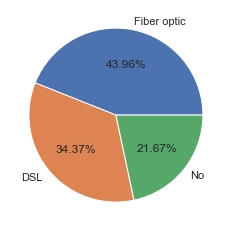

In [118]:
plt.pie(df['InternetService'].value_counts().values,labels=df['InternetService'].value_counts().index,autopct='%1.2f%%')

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

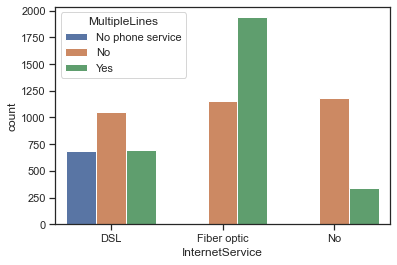

In [119]:
sns.countplot(df['InternetService'],hue=df['MultipleLines'])

([<matplotlib.patches.Wedge at 0x23f70fbcd60>,
 [Text(0.011530382742536482, 1.0999395666461913, 'No'),
  Text(-0.7011814628356199, -0.8475520964375585, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.006289299677747172, 0.5999670363524678, '49.67%'),
  Text(-0.38246261609215626, -0.46230114351139545, '28.67%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

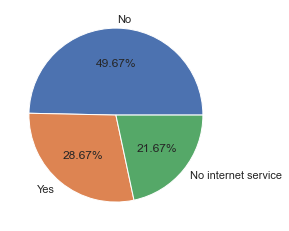

In [120]:
plt.pie(df['OnlineSecurity'].value_counts().values,labels=df['OnlineSecurity'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f71010940>,
 [Text(0.21138010801255863, 1.0794991662509976, 'No'),
  Text(-0.8436292603186925, -0.7058963600516268, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.11529824073412287, 0.5888177270459987, '43.84%'),
  Text(-0.46016141471928673, -0.38503437820997827, '34.49%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

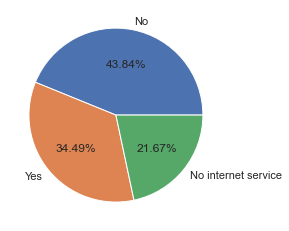

In [121]:
plt.pie(df['OnlineBackup'].value_counts().values,labels=df['OnlineBackup'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f71063670>,
 [Text(0.20800849946792185, 1.080153907621087, 'No'),
  Text(-0.8414211562608911, -0.7085269492380549, 'Yes'),
  Text(0.8548553357827734, -0.692258878515633, 'No internet service')],
 [Text(0.11345918152795736, 0.589174858702411, '43.94%'),
  Text(-0.45895699432412235, -0.386469245038939, '34.39%'),
  Text(0.46628472860878545, -0.3775957519176179, '21.67%')])

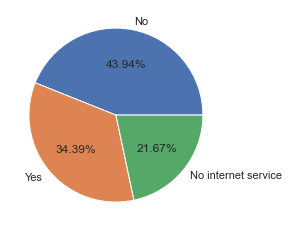

In [122]:
plt.pie(df['DeviceProtection'].value_counts().values,labels=df['DeviceProtection'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f710bc1f0>,
 [Text(0.023795397047164612, 1.0997425967376948, 'No'),
  Text(-0.7105891537173198, -0.8396803288271695, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.012979307480271604, 0.5998595982205608, '49.31%'),
  Text(-0.38759408384581073, -0.45800745208754695, '29.02%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

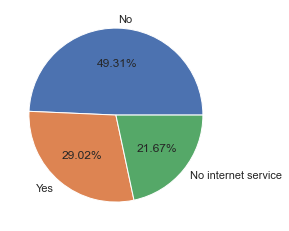

In [123]:
plt.pie(df['TechSupport'].value_counts().values,labels=df['TechSupport'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f71101ee0>,
 [Text(0.3432768520552361, 1.0450650711046885, 'No'),
  Text(-0.9244614473012523, -0.5961300465952661, 'Yes'),
  Text(0.8548553357827734, -0.692258878515633, 'No internet service')],
 [Text(0.18724191930285602, 0.5700354933298301, '39.90%'),
  Text(-0.5042516985279557, -0.3251618435974179, '38.44%'),
  Text(0.46628472860878545, -0.3775957519176179, '21.67%')])

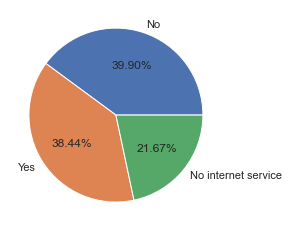

In [124]:
plt.pie(df['StreamingTV'].value_counts().values,labels=df['StreamingTV'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f71153ac0>,
 [Text(0.3549092210143265, 1.0411721494733732, 'No'),
  Text(-0.9310514684948953, -0.5857842290583618, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.19358684782599625, 0.5679120815309308, '39.54%'),
  Text(-0.50784625554267, -0.31951867039547005, '38.79%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

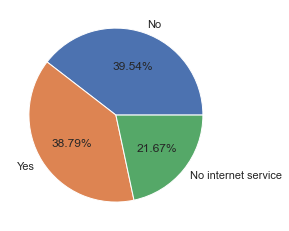

In [125]:
plt.pie(df['StreamingMovies'].value_counts().values,labels=df['StreamingMovies'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f711a8790>,
 [Text(-0.17273219343040325, 1.0863533446134006, 'Month-to-month'),
  Text(-0.526752873107977, -0.9656766594841628, 'Two year'),
  Text(0.8709808402501051, -0.6718574074290027, 'One year')],
 [Text(-0.09421756005294721, 0.5925563697891275, '55.02%'),
  Text(-0.2873197489679874, -0.5267327233549979, '24.07%'),
  Text(0.4750804583182391, -0.36646767677945596, '20.91%')])

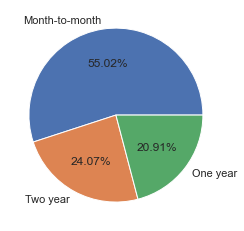

In [126]:
plt.pie(df['Contract'].value_counts().values,labels=df['Contract'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f71201400>,
 [Text(-0.31424730634794096, 1.0541577825226467, 'Yes'),
  Text(0.31424730634794035, -1.0541577825226467, 'No')],
 [Text(-0.17140762164433143, 0.5749951541032617, '59.22%'),
  Text(0.1714076216443311, -0.5749951541032617, '40.78%')])

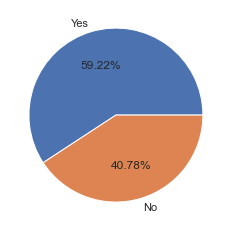

In [127]:
plt.pie(df['PaperlessBilling'].value_counts().values,labels=df['PaperlessBilling'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x23f712449d0>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')],
 [Text(0.2959735489899328, 0.5219192066769567, '33.58%'),
  Text(-0.5709062273412193, 0.18456998559629328, '22.89%'),
  Text(-0.27478808852308717, -0.5333774520973191, '21.92%'),
  Text(0.46695777995962423, -0.3767630976292385, '21.61%')])

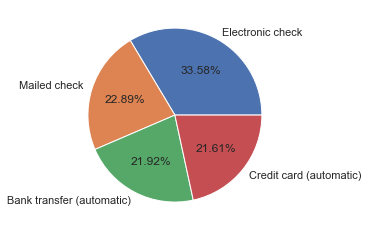

In [128]:
plt.pie(df['PaymentMethod'].value_counts().values,labels=df['PaymentMethod'].value_counts().index,autopct='%1.2f%%')

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

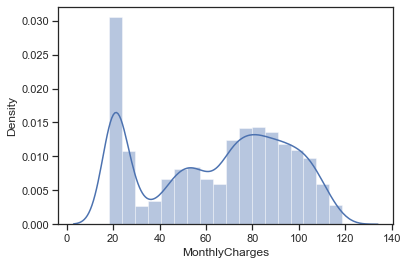

In [129]:
sns.distplot(df['MonthlyCharges'])

In [131]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [133]:
import pandas as pd
#Lets do the conversion of "TotalCharges" column to float type
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

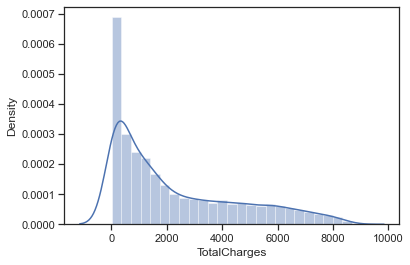

In [134]:
sns.distplot(df['TotalCharges'])

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

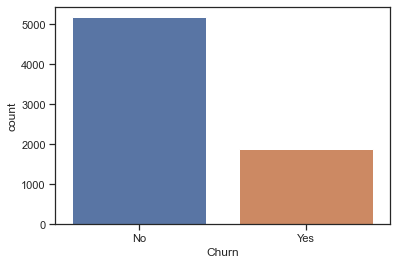

In [135]:
sns.countplot(df['Churn'])

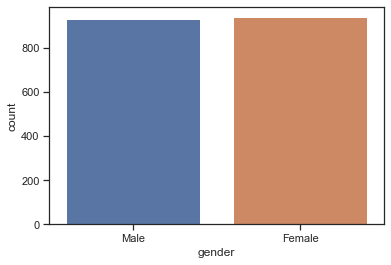

In [136]:
#sns.countplot('gender',hue='Churn',data=df)
#So boh type of genders equally churned
sns.countplot(x="gender",data=df.loc[df["Churn"]=="Yes"])
plt.show()

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


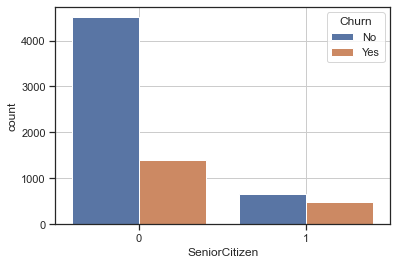

In [137]:
sns.countplot('SeniorCitizen',hue='Churn',data=df)
plt.grid()

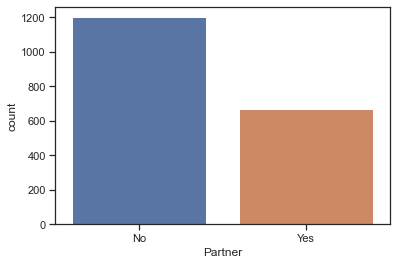

In [138]:
#sns.countplot('Partner',hue='Churn',data=df)

sns.countplot(x="Partner",data=df.loc[df["Churn"]=="Yes"])
plt.show()
#churn in unmarried persons are more compared to married eventhough both type of customers almost equally exist in dataset

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

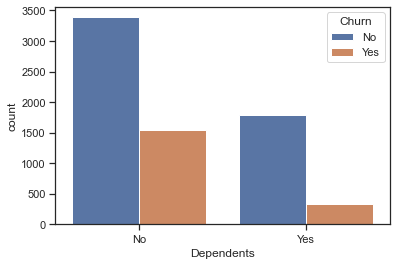

In [139]:
sns.countplot('Dependents',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

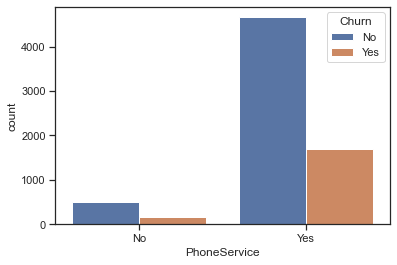

In [140]:
sns.countplot('PhoneService',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

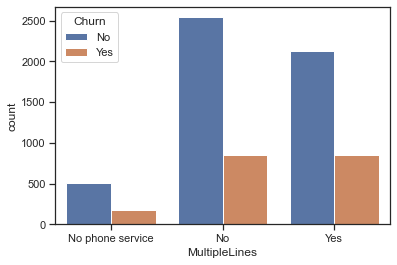

In [141]:
sns.countplot('MultipleLines',hue='Churn',data=df)

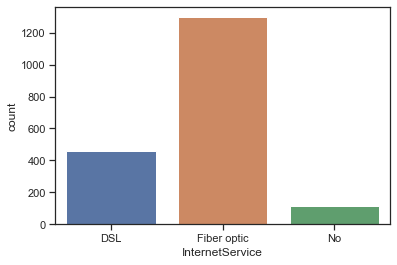

In [142]:
#sns.countplot('InternetService',hue='Churn',data=df)

sns.countplot(x="InternetService",data=df.loc[df["Churn"]=="Yes"])
plt.show()
#High amount of people i.e more than 1200 who churned are having InternetService of Fiber optic type
#So may be this type of service is bad and needs to be focussed on 

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

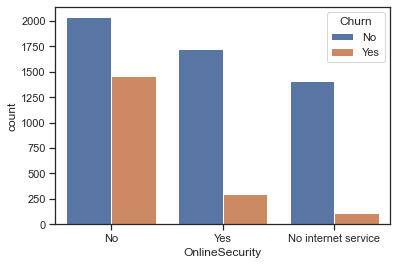

In [143]:
sns.countplot('OnlineSecurity',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

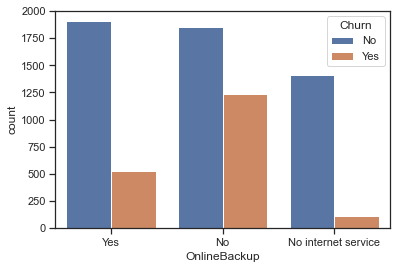

In [144]:
sns.countplot('OnlineBackup',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

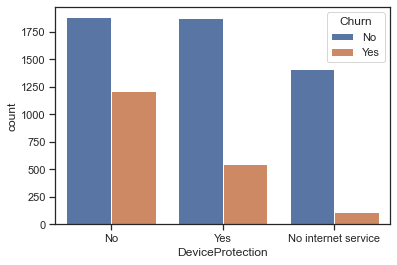

In [145]:
sns.countplot('DeviceProtection',hue='Churn',data=df)

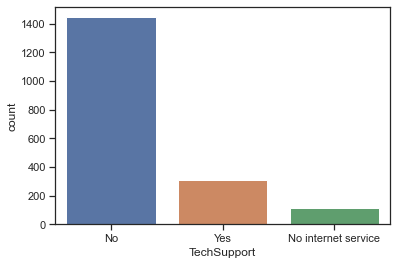

In [146]:
#sns.countplot('TechSupport',hue='Churn',data=df)

sns.countplot(x="TechSupport",data=df.loc[df["Churn"]=="Yes"])
plt.show()
#Around 1400 people who churned were not having TechSupport
#We should chcek the reason behind this too

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

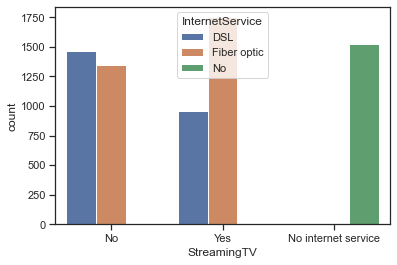

In [147]:
sns.countplot('StreamingTV',hue='InternetService',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

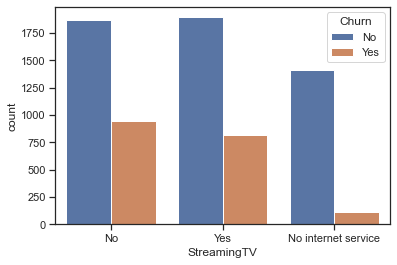

In [148]:
sns.countplot('StreamingTV',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

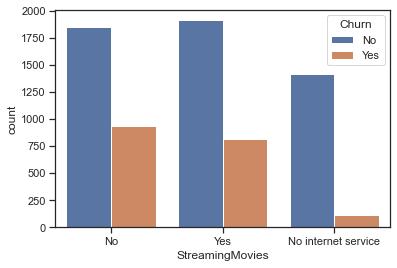

In [149]:
sns.countplot('StreamingMovies',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

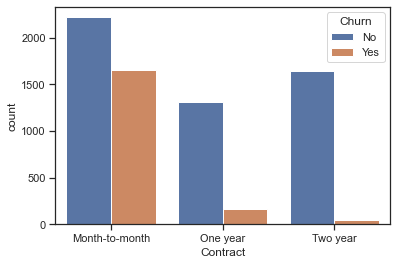

In [150]:
sns.countplot('Contract',hue='Churn',data=df)

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

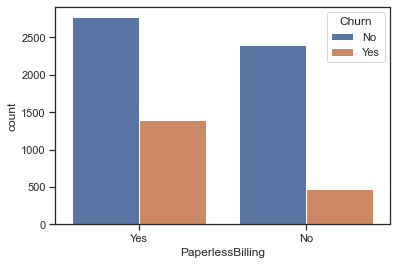

In [151]:
sns.countplot('PaperlessBilling',hue='Churn',data=df)

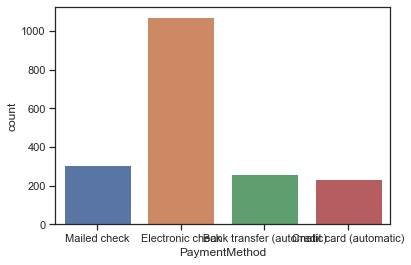

In [152]:
#sns.countplot('PaymentMethod',hue='Churn',data=df)

sns.countplot(x="PaymentMethod",data=df.loc[df["Churn"]=="Yes"])
plt.show()
#Here we obseved churn is higher around 1100 i.e more than 50% of churn where customers are using "Electronic check"
#We can say this mode of payment has multiple issues because of which customers are dissatisfied

C:\Users\ndurg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

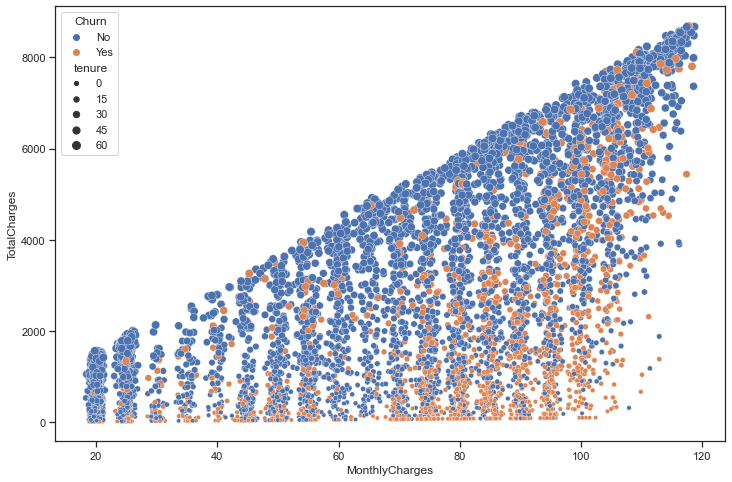

In [153]:
plt.figure(figsize=(12,8))
sns.scatterplot('MonthlyCharges','TotalCharges',hue='Churn',size='tenure',data=df)

In [154]:
df['MonthlyCharges'].max()

118.75

In [155]:
df['MonthlyCharges'].sort_values()

3719     18.25
1529     18.40
6652     18.55
6906     18.70
1156     18.70
         ...  
5127    118.35
3894    118.60
4804    118.60
2115    118.65
4586    118.75
Name: MonthlyCharges, Length: 7043, dtype: float64

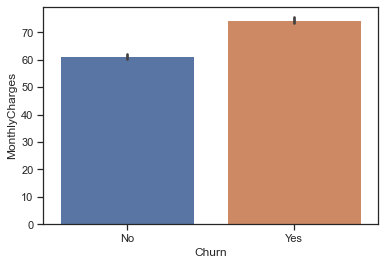

In [156]:
sns.barplot(x="Churn",y="MonthlyCharges",data=df)
plt.show()
#customers who churned were charged more than who didnt

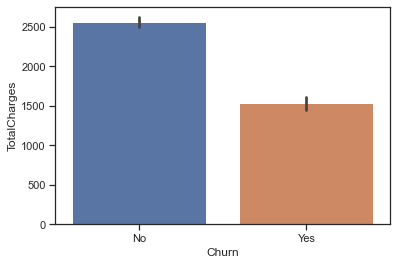

In [157]:
sns.barplot(x="Churn",y="TotalCharges",data=df)
plt.show()
#customers who didnt chuned has averge total charges more

In [158]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [159]:
df[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [160]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

C:\Users\ndurg\AppData\Local\Temp/ipykernel_19760/3248641435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn']=le.fit_transform(data['Churn'])


<AxesSubplot:>

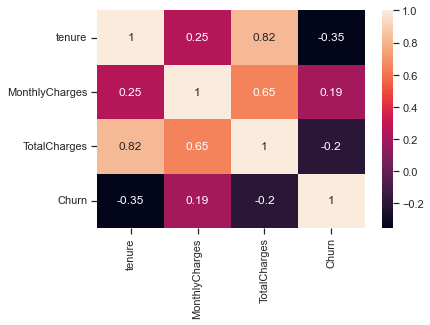

In [161]:
# Correlation check:
data=df[['tenure','MonthlyCharges','TotalCharges','Churn']]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])

sns.heatmap(data.corr(),annot=True)

In [162]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [163]:
X.shape , Y.shape

((7043, 19), (7043,))

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

In [164]:
X.skew()

C:\Users\ndurg\AppData\Local\Temp/ipykernel_19760/1164782681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [165]:
X['tenure']=X['tenure'].astype(float)

In [166]:
X['tenure'].dtypes

dtype('float64')

In [167]:
num=X[['tenure','MonthlyCharges','TotalCharges']]
num

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [168]:
from sklearn.preprocessing import power_transform
trans=power_transform(num)
trans

array([[-1.6443435 , -1.1585412 , -1.81058786],
       [ 0.29720527, -0.23949171,  0.25331304],
       [-1.49544443, -0.34266505, -1.38726921],
       ...,
       [-0.72512119, -1.16724064, -0.85989943],
       [-1.26512968,  0.33431207, -0.92296815],
       [ 1.20189603,  1.33886338,  1.48444325]])

In [169]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num=sc.fit_transform(trans)
number=pd.DataFrame(num)
number

,0,1,2
0,-1.644343,-1.158541,-1.810588
1,0.297205,-0.239492,0.253313
2,-1.495444,-0.342665,-1.387269
3,0.646327,-0.731079,0.232253
4,-1.495444,0.213545,-1.250118
...,...,...,...
7038,-0.078084,0.671510,0.295688
7039,1.342198,1.260981,1.567097
7040,-0.725121,-1.167241,-0.859899
7041,-1.265130,0.334312,-0.922968


In [170]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [172]:
cat=df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [173]:
category=pd.get_dummies(cat,drop_first=True)
category

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [174]:
number.shape , category.shape

((7043, 3), (7043, 26))

In [175]:
type(number)  , type(category)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [176]:
X=pd.concat([number,category],axis=1)

In [177]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.modules.joblib']=joblib

In [178]:
from sklearn.cluster import AffinityPropagation
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

C:\Users\ndurg\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [179]:
x.shape , y.shape

((10348, 29), (10348,))

In [180]:
import warnings
warnings.filterwarnings("ignore")

In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
x=pd.DataFrame(x)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred)
print('Logistic Regression:', lr_ac * 100)

Logistic Regression: 80.99838969404188


In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)

y_pred =dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, y_pred)
print('Decision Tree:',dtc_acc * 100)

Decision Tree: 77.61674718196457


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
rfc= RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, y_pred)
print('Random Forest:',rfc_acc * 100)

Random Forest: 84.12238325281804


In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
print('Knn:',knn_acc * 100)

Knn: 79.74235104669887


In [188]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
svc_ac = accuracy_score(y_test, y_pred)
print('SVM:', svc_ac * 100)

SVM: 80.57971014492755


In [189]:
print('Logistic Regression:', lr_ac * 100)
print('Decision Tree:',dtc_acc * 100)
print('Random Forest:',rfc_acc * 100)
print('Knn:',knn_acc * 100)
print('SVM:', svc_ac * 100)

Logistic Regression: 80.99838969404188
Decision Tree: 77.61674718196457
Random Forest: 84.12238325281804
Knn: 79.74235104669887
SVM: 80.57971014492755
